# Notebook for Golden-Rule Instanton


Purpose: implement the golden-rule ring-polymer instanton method for normal and inverted regime <br><br>
Reference: 10.1063/1.4932362

## 1. Introduction
---

### 1.1. Golden-Rule Instanton

以下のtwo-stateハミルトニアンを考える。
$$
\hat{H} = \hat{H}_0 \ket{0}\bra{0} + \hat{H}_1 \ket{1}\bra{1} + \Delta(\hat{x})(\ket{0}\bra{1} + \ket{1}\bra{0})
$$
ここで、
$$
\hat{H}_n = \sum_{j=1}^f \frac{\hat{p}_j^2}{2m} + V_n(\hat{x})
$$
次に、このハミルトニアンに対して 虚時間の周回軌道 = インスタントンを考える。
インスタントンは、2つのポテンシャル、$V_0(\hat{x})$, $V_1(\hat{x})$ を上下ひっくり返したポテンシャル上のトラジェクトリーから構成され、$V_0(\hat{x}) = V_1(\hat{x})$ を満たすcrossing seam上の点 $x^\ddag$で接続される。
それぞれの状態(n=0 or 1)が上の各trajectoryに対するのEuclidean action $S_n$は、以下のように定義される。
$$
S_n \equiv S_n(x', x'', \tau_n) = \int_0^{\tau_n} [\frac{1}{2}m |\frac{\partial x(\tau)}{\partial \tau}|^2 + V_n(x(\tau))] d\tau
$$
ここで、$x(\tau)$ は $x(0) = x', x(\tau_n) = x''$を満たす、古典的に禁制なtrajectoryを表す。
虚時間 $\beta \hbar$ を経て2つの状態を周回する軌道に対するEuclidean actionは、
$$
S(x', x'', \tau) = S_0(x', x'', \beta \hbar - \tau) + S_1(x'', x', \tau)
$$
となる。
$x', x'', \tau$に対してstationaryとなるように(この時、$x' = x''=x^\ddag$)決めたEuclidean actionを $S$と表記すると、
golden rule instanton rate のsemiclassical approximationは、以下の式で表される。
$$
k_{SC} Z_0 = \sqrt{2\pi \hbar } \frac{\Delta^2}{\hbar^2} \sqrt{\frac{C_0C_1}{-\Sigma}} e^{-S/\hbar}
$$
$$
k_{SC} Z_0 = \sqrt{2\pi \hbar } \frac{\Delta^2}{\hbar^2} \sqrt{\frac{C_0C_1}{C}} (-\frac{d^2S}{d\tau^2})^{-\frac{1}{2}} e^{-S/\hbar}
$$
ここで、
$$
C_n = |-\frac{\partial^2 S_n}{\partial x' \partial x''}|
$$
$$
C = 
\begin{vmatrix}
\frac{\partial^2 S_n}{\partial x' \partial x'}  & \frac{\partial^2 S_n}{\partial x' \partial x''}  \\
\frac{\partial^2 S_n}{\partial x'' \partial x'} & \frac{\partial^2 S_n}{\partial x'' \partial x''} \\
\end{vmatrix}
$$
$$
\Sigma = 
\begin{vmatrix}
\frac{\partial^2 S_n}{\partial x' \partial x'}  & \frac{\partial^2 S_n}{\partial x' \partial x''}  & \frac{\partial^2 S_n}{\partial x' \partial \tau} \\
\frac{\partial^2 S_n}{\partial x'' \partial x'} & \frac{\partial^2 S_n}{\partial x'' \partial x''} & \frac{\partial^2 S_n}{\partial x'' \partial \tau }\\
\frac{\partial^2 S_n}{\partial \tau \partial x'} & \frac{\partial^2 S_n}{\partial \tau \partial x''} & \frac{\partial^2 S_n}{\partial \tau \partial \tau }\\
\end{vmatrix}
$$


### 1.2. ring-polymer formalism

上の速度定数は、インスタントンとそのderivativeが与えられれば、計算できる。 <br>
実際の非調和ポテンシャルに適用するためには、経路を離散化して、数値計算で取り扱えるようにする必要がある。<br>
あるorbitを $N$個に分割して、$N_0$個が $\ket{0}$に、残りの$N_1 = N - N_0$個が $\ket{1}$上に存在していることを考える。

この時、total actionは、以下の式で与えられる。
$$
S_0(x_N,x_1, ..., x_{N_0}; N_0 \beta_N \hbar) + S_1(x_{N_0},x_{N_0 + 1}, ..., x_N; N_1 \beta_N \hbar) = \beta_N U_N(\mathbf x)
$$
$$
U_N(\mathbf x) = \sum_{i=1}^N \frac{m}{2\beta_N^2\hbar^2} |x_{i+1} - x_i|^2 + 
\frac{1}{2}V_0(x_{N})     + \sum_{i=1}^{N_0-1} V_0(x_i) + \frac{1}{2}V_0(x_{N_0}) +
\frac{1}{2}V_1(x_{N_0})   + \sum_{i=N_0+1}^{N-1} V_1(x_i) + \frac{1}{2}V_1(x_{N})
$$
$ U_N(\mathbf x) $を $\mathbf x = {x1, ..., x_N}$について極小化することで、$\mathbf x $についてstationaryなxを最適化で求めることができる。ただし、$\tau$に関しては最適ではないので、 種々の$\tau$をtryして、stationaryとなる値を得る必要がある。
$\mathbf x$ を $\tilde{\mathbf x} = {\tilde{x}_1, ...,\tilde{x}_N }$とし、$\tilde{S} = \beta_N \tilde{U}_N$, $\tilde{U}_N = U_N(\tilde{\mathbf x})$とすると、速度定数は、
$$
k_{SC} Z_0 = \sqrt{2\pi \hbar}  \frac{\Delta^2}{\hbar^2} |\frac{\beta_N^2 \hbar^2}{m} \nabla^2 \tilde{U}_N|^{-\frac{1}{2}} 
            (-\frac{d^2 \tilde S}{d\tau^2})^{-\frac{1}{2}} e^{-\beta_N \tilde{U}_N}
$$
として得られる。
この時、$\nabla^2 \tilde{U}_N$ は、すべてのbeadsについて微分したHessianらしい。


> [!NOTE]
> 上の式で評価する場合とこちらの式で評価する場合では、どちらが良いのか。。。

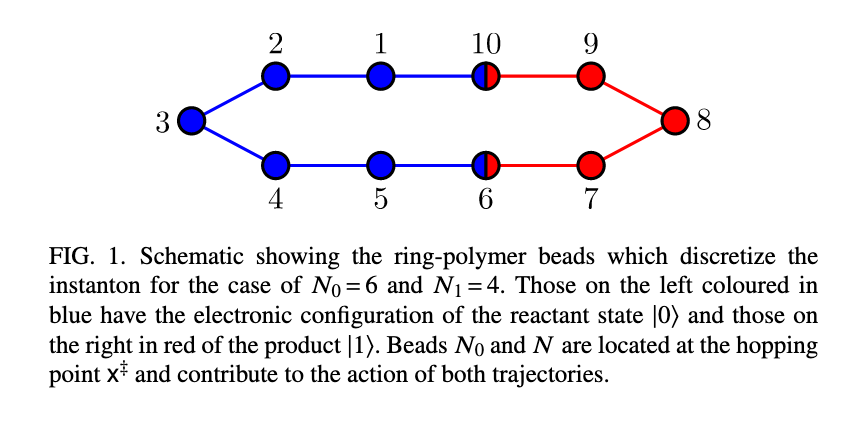

$$
U_N(\mathbf x) = \sum_{i=1}^N \frac{m}{2\beta_N^2\hbar^2} |x_{i+1} - x_i|^2 + 
\frac{1}{2}V_0(x_{N})     + \sum_{i=1}^{N_0-1} V_0(x_i) + \frac{1}{2}V_0(x_{N_0}) +
\frac{1}{2}V_1(x_{N_0})   + \sum_{i=N_0+1}^{N-1} V_1(x_i) + \frac{1}{2}V_1(x_{N})
$$
について、gradientとhessianを考える。

- gradient: 
$$
\frac{\partial U_N(\mathbf x )}{\partial x_N} = \frac{m}{\beta_N^2\hbar^2} ( -(x_{1} - x_N) + (x_N - x_{N-1})) + \frac{1}{2}( \nabla_{x_N} V_0(x_N) + \nabla_{x_N} V_1(x_N))
$$
$$
\frac{\partial U_N(\mathbf x )}{\partial x_i} = \frac{m}{\beta_N^2\hbar^2} ( -(x_{i+1} - x_i) + (x_i - x_{i-1})) + \nabla_{x_i} V_0(x_i) (i = 1, ..., N_0 - 1)
$$
$$
\frac{\partial U_N(\mathbf x )}{\partial x_{N_0}} = \frac{m}{\beta_N^2\hbar^2} ( -(x_{N_0+1} - x_{N_0}) + (x_{N_0} - x_{N_0-1})) + \frac{1}{2}( \nabla_{x_{N_0}} V_0(x_{N_0}) + \nabla_{x_{N_0}} V_1(x_{N_0}))
$$
$$
\frac{\partial U_N(\mathbf x )}{\partial x_i} = \frac{m}{\beta_N^2\hbar^2} ( -(x_{i+1} - x_i) + (x_i - x_{i-1})) + \nabla_{x_i} V_1(x_i) (i = N_0+1, ..., N - 1)
$$

### 1.3. Half ring-polymer

インスタントンは行きと帰りで同じ経路を辿るので、半分だけ計算すればいい。という考えが、half-ring polymer


## 2. Prepare general parameters
---

In [178]:
## physical constants are prepared in atomic unit
import sys
sys.path.append( "/Users/tito/repos/Argon")
from argon.units import KB, Bohr, CmInv, Hartree, HBar, Joule, Metre, NAvo_SI, SpeedOfLight_SI, kg, Kelvin, Joule, NAvo, HPlank,Sec, me, eV, mol, kcal, amu, KB_SI
HBar_au = 1.0 ## in atomic unit

## 2. Prepare Potential class
---

### 2.1. prepare potential class

In [2]:
from abc import ABCMeta, abstractmethod

In [3]:
class Potential(metaclass=ABCMeta) :

    def __init__(self) :

        pass

    @abstractmethod
    def energy(self, x) -> float:

        pass

    @abstractmethod
    def gradient(self, x) :

        pass

    @abstractmethod
    def hessian(self, x) :

        pass

### 2.2. prepare harmonic potential

In [4]:
import numpy as np

class HarmonicPotential( Potential ) :
    
    def __init__(self, hess, x0 = None, V0 = 0.0, mass = 1) :

        self.hess = np.array( hess )
        self.mass  = mass
        self.n_dim = len( self.hess )
        self.V0 = V0
        if x0 is None :
            self.x0    = np.zeros(self.n_dim, dtype=float)
        else : 
            self.x0    = np.array( x0 )

        assert self.n_dim == len( self.x0 )

    def energy(self, x):

        assert len(x) == self.n_dim
        x = np.array(x)

        return 0.5*(x-self.x0)@self.hess@(x-self.x0).T + self.V0

    def gradient(self, x):

        assert len(x) == self.n_dim
        x = np.array(x)

        return self.hess@(x-self.x0).T 

    def hessian(self, x):

        assert len(x) == self.n_dim
        x = np.array(x)
        return self.hess

## practice
x0 = [-1.0, 1.0]
freqs = np.array([1.0, 2.0])
hess = np.diag( freqs**2 )




In [5]:
print( f"{HarmonicPotential(hess).energy([0.0,0.0]) = }" )
print( f"{HarmonicPotential(hess).energy([0.0,3.0]) = }" )
print( f"{HarmonicPotential(hess).energy([1.0,0.0]) = }" )
print( f"{HarmonicPotential(hess, x0).energy([0.0,0.0]) = }" )
print( f"{HarmonicPotential(hess, x0).energy([0.0,3.0]) = }" )
print( f"{HarmonicPotential(hess, x0).energy([1.0,0.0]) = }" )

print( f"{HarmonicPotential(hess, x0, 0.0).energy([0.0,0.0]) = }" )
print( f"{HarmonicPotential(hess, x0, 1.0).energy([0.0,0.0]) = }" )
print( f"{HarmonicPotential(hess, x0, 2.0).energy([0.0,0.0]) = }" )

print( f"{HarmonicPotential(hess).gradient([0.0,0.0]) = }" )
print( f"{HarmonicPotential(hess).gradient([0.0,3.0]) = }" )
print( f"{HarmonicPotential(hess).gradient([1.0,0.0]) = }" )
print( f"{HarmonicPotential(hess).gradient([1.0,1.0]) = }" )

print( f"{HarmonicPotential(hess).hessian([0.0,0.0]) = }" )
print( f"{HarmonicPotential(hess).hessian([0.0,3.0]) = }" )
print( f"{HarmonicPotential(hess).hessian([1.0,0.0]) = }" )
print( f"{HarmonicPotential(hess).hessian([1.0,1.0]) = }" )

HarmonicPotential(hess).energy([0.0,0.0]) = np.float64(0.0)
HarmonicPotential(hess).energy([0.0,3.0]) = np.float64(18.0)
HarmonicPotential(hess).energy([1.0,0.0]) = np.float64(0.5)
HarmonicPotential(hess, x0).energy([0.0,0.0]) = np.float64(2.5)
HarmonicPotential(hess, x0).energy([0.0,3.0]) = np.float64(8.5)
HarmonicPotential(hess, x0).energy([1.0,0.0]) = np.float64(4.0)
HarmonicPotential(hess, x0, 0.0).energy([0.0,0.0]) = np.float64(2.5)
HarmonicPotential(hess, x0, 1.0).energy([0.0,0.0]) = np.float64(3.5)
HarmonicPotential(hess, x0, 2.0).energy([0.0,0.0]) = np.float64(4.5)
HarmonicPotential(hess).gradient([0.0,0.0]) = array([0., 0.])
HarmonicPotential(hess).gradient([0.0,3.0]) = array([ 0., 12.])
HarmonicPotential(hess).gradient([1.0,0.0]) = array([1., 0.])
HarmonicPotential(hess).gradient([1.0,1.0]) = array([1., 4.])
HarmonicPotential(hess).hessian([0.0,0.0]) = array([[1., 0.],
       [0., 4.]])
HarmonicPotential(hess).hessian([0.0,3.0]) = array([[1., 0.],
       [0., 4.]])
HarmonicPo

### 2.3. module for visualization

self.n_dim = 1


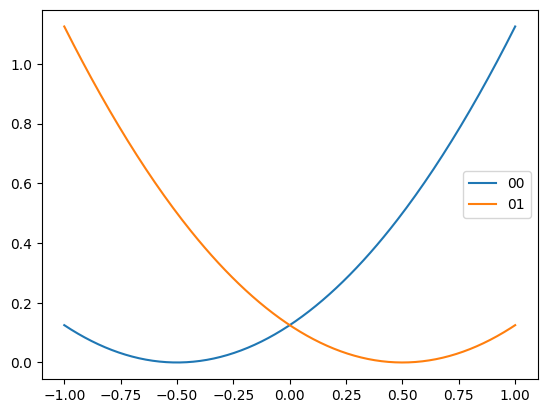

self.n_dim = 2


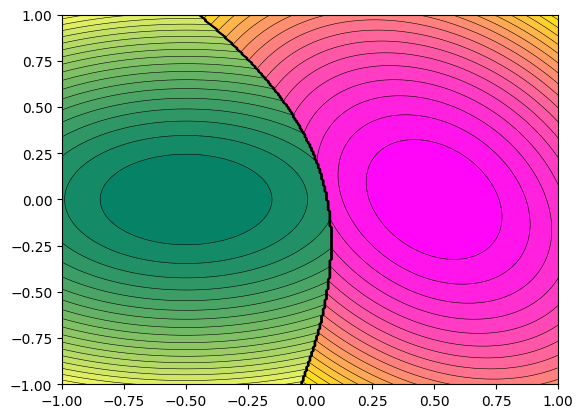

self.n_dim = 2


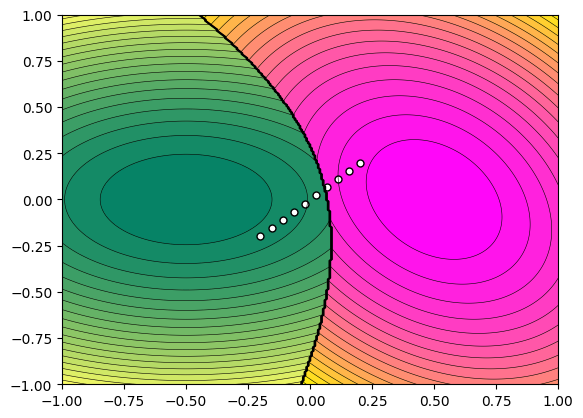

In [195]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#cmaps = ['pink', 'summer', 'spring' ,'autumn', 'winter', 'cool',
#        I'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'] 
cmaps = ['summer', 'spring', 'autumn', 'winter'  ]
#cmaps = ['summer', 'summer' ]

class PESVisualizer :

    def __init__(self, potentials, lims = None, vecs = None, n_grid = 30) :

        self.potentials = potentials
        self.n_grid = n_grid
        self.levels = 20

        if vecs is None :
            self.vecs = np.eye(self.potentials[0].n_dim)[:1]
        else :
            self.vecs = np.array( vecs )

        self.n_dim = len( self.vecs )

        if lims is None :
            self.lims = [ [-1.0, 1.0 ] for i_dim in range( self.n_dim ) ]
        else :
            self.lims = lims

        assert self.n_dim < 3 and self.n_dim > 0
        assert self.vecs.shape == (self.n_dim, self.potentials[0].n_dim)
        assert len( self.lims )  == self.n_dim

        print(f"{self.n_dim = }")

    def plot(self, points = None, trajs = None ) :

        if points is not None :

            #assert np.shape( points )[1] == self.n_dim
            assert np.shape( points )[1] == self.n_dim or \
                   np.shape( points )[1] == self.potentials[0].n_dim

        if len(self.vecs) == 1 :

            self._plot_1d()

        elif len(self.vecs) == 2 :

            self._plot_2d(points = points)

    def _plot_1d(self) :

        xs   = np.linspace(self.lims[0][0], self.lims[0][1],  self.n_grid)

        vec = np.array( vecs[0] )

        enes_list =  [ [ potential.energy(vec*x) for x in xs ]
                        for potential in self.potentials ]

        #idx_min_mesh = np.argmin( enes_list, axis=0 )

        fig, ax = plt.subplots()
        for i, enes in enumerate(enes_list) :
            ax.plot( xs, enes, label=f"{i:02d}" )
            #enes_masked = np.ma.masked_where(idx_min_mesh != i, enes) 
            #ax.scatter( xs, enes_masked, label=f"{i:02d}-masked", marker='x' )
        plt.legend()
        plt.show()

    def _plot_2d(self, points = None) :


        xs = np.linspace(self.lims[0][0], self.lims[0][1],  self.n_grid)
        ys = np.linspace(self.lims[1][0], self.lims[1][1],  self.n_grid)

        x_mesh, y_mesh = np.meshgrid( xs, ys )
        ene_meshes = [ np.reshape( [ potential.energy( (self.vecs[0]*x + self.vecs[1]*y) ) for x, y 
                       in zip(x_mesh.flatten(), 
                              y_mesh.flatten())], x_mesh.shape ) 
                     for potential in self.potentials]
        idx_min_mesh = np.argmin( ene_meshes, axis=0 )
        # print(idx_min_mesh[-1,-1])

        fig, ax = plt.subplots()
        for i, ene_mesh in enumerate(ene_meshes) :
            ene_mesh_masked = np.ma.masked_where(idx_min_mesh != i, ene_meshes[i]) 
            mappable = ax.contourf(x_mesh, y_mesh, ene_mesh_masked,self.levels , cmap=cmaps[i%len(cmaps)])
            ax.contour(            x_mesh, y_mesh, ene_mesh_masked,self.levels ,colors="k", linewidths=0.4)
        
        ## for crossing seam
        ax.contour(x_mesh, y_mesh, idx_min_mesh, len(self.potentials), colors="k", linewidths=1.0, linestyles='-')

        ## plot given points
        if points is not None :
            points = np.array( points )
            if points.shape[1] == 2 :
                points_2d = points
            elif points.shape[1] == self.potentials[0].n_dim :
                points_2d = points@self.vecs.T
            ax.scatter(points_2d.T[0], points_2d.T[1], s=25, alpha=1, edgecolors='k', c='white')

        plt.show()
        pass

## ----------------------------
## just for test
## ----------------------------
hess0 = np.diag([1.0,2.0])
hess1 = np.diag([1.0,2.0])
theta = np.pi/3
R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
hess1 = R.T@hess1@R

## 1 dim. plot test
vecs  = [ [1.0, 0.0 ] ]
PESVisualizer( [ HarmonicPotential(hess0, [ -0.5, 0.0]), 
                 HarmonicPotential(hess0, [  0.5, 0.0]) ], vecs = vecs, n_grid = 200 ).plot()

## 2 dim. plot test
vecs  = np.diag([1.0,1.0])
PESVisualizer( [ HarmonicPotential(hess0, [ -0.5, 0.0]), 
                 HarmonicPotential(hess1, [  0.5, 0.0]) ], vecs = vecs, n_grid = 300 ).plot()
PESVisualizer( [ HarmonicPotential(hess0, [ -0.5, 0.0]), 
                 HarmonicPotential(hess1, [  0.5, 0.0]) ], vecs = vecs, n_grid = 300 ).plot(points=np.transpose([np.linspace(-0.2,0.2,10),np.linspace(-0.2,0.2,10)]))
# PESVisualizer( [ HarmonicPotential(hess0, [ -0.5, 0.0]), 
#                  HarmonicPotential(hess1, [  0.5, 0.0], V0=0.2) ], vecs = vecs, n_grid = 300 ).plot()
# PESVisualizer( [ HarmonicPotential(hess0, [ -0.5, 0.0]), 
#                  HarmonicPotential(hess1, [  0.5, 0.0], V0=0.4) ], vecs = vecs, n_grid = 300 ).plot()
# PESVisualizer( [ HarmonicPotential(hess0, [ -0.5, 0.0]), 
#                  HarmonicPotential(hess1, [  0.5, 0.0], V0=0.6) ], vecs = vecs, n_grid = 300 ).plot()





## 3. Prepare Ring-Polymer Potential class
---

### 3.1. prepare ring-polymer class

In [7]:
class RingPolymerPotential :

    def __init__(self, potentials, beta, N0, N1, mass = 1) :

        self.potentials = potentials
        self.beta = beta
        self.mass = mass
        self.N0   = N0
        self.N1   = N1

        assert len( set([potential.n_dim for potential in self.potentials]) ) == 1
        assert len( self.potentials ) == 2

        self.n_dim_pot = self.potentials[0].n_dim

        self.n_dim = self.N0 + self.N1

    def energy( self, xs ) :

        xs, n_beads, beta_N, coeff = self._check_xs(xs)
        ene = 0.0

        ## compute spring term
        ene += 0.50*coeff*np.linalg.norm(xs - np.roll(xs, 1, axis=0))**2.0

        ## compute potentital energy term at state 0
        ene += 0.50*self.potentials[0].energy( xs[-1] ) 
        for x in xs[:self.N0-1] :
            ene += self.potentials[0].energy(x)
        ene += 0.50*self.potentials[0].energy( xs[self.N0-1] ) 

        ## compute potentital energy term at state 1
        ene += 0.50*self.potentials[1].energy( xs[self.N0-1] ) 
        for x in xs[self.N0:-1] :
            ene += self.potentials[1].energy(x)
        ene += 0.50*self.potentials[1].energy( xs[-1] ) 

        return ene

    def gradient(self, xs ) :

        xs, n_beads, beta_N, coeff = self._check_xs(xs)

        ## compute spring term
        grad = coeff*(2*xs - (np.roll(xs, 1,axis=0) + np.roll(xs, -1,axis=0) ) )

        ## compute enegy term
        grad[-1,:] += 0.50*(self.potentials[0].gradient(xs[-1])+ self.potentials[1].gradient(xs[-1]))
        for i, x in enumerate( xs[:self.N0-1]) :
            grad[i,:] += self.potentials[0].gradient(x)
        grad[self.N0-1,:] += 0.50*(self.potentials[0].gradient(xs[self.N0-1])+ self.potentials[1].gradient(xs[self.N0-1]))
        for i, x in enumerate( xs[self.N0:-1]) :
        #for i, x in np.array( enumerate( xs ))[self.N0:-1] :
            grad[self.N0+i,:] += self.potentials[1].gradient(x)

        return grad
        

    def hessian(self, xs) :

        xs, n_beads, beta_N, coeff = self._check_xs(xs)

    def _check_xs(self, xs ) :

        ## prepare xs
        xs = np.array(xs)
        assert xs.shape[1] == self.n_dim_pot
        assert xs.shape[0] == self.N0 + self.N1
        n_beads = xs.shape[0]

        ## prepare params
        beta_N = self.beta/n_beads
        coeff = self.mass/(beta_N*HBar_au)

        return xs, n_beads, beta_N, coeff




#### 3.1.xxx test

[[ 2.44929360e-17 -4.50000000e-01]
 [-1.53073373e-01 -4.53806023e-01]
 [-2.82842712e-01 -4.64644661e-01]
 [-3.69551813e-01 -4.80865828e-01]
 [-4.00000000e-01 -5.00000000e-01]
 [-3.69551813e-01 -5.19134172e-01]
 [-2.82842712e-01 -5.35355339e-01]
 [-1.53073373e-01 -5.46193977e-01]
 [-7.34788079e-17 -5.50000000e-01]
 [ 1.53073373e-01 -5.46193977e-01]
 [ 2.82842712e-01 -5.35355339e-01]
 [ 3.69551813e-01 -5.19134172e-01]
 [ 4.00000000e-01 -5.00000000e-01]
 [ 3.69551813e-01 -4.80865828e-01]
 [ 2.82842712e-01 -4.64644661e-01]
 [ 1.53073373e-01 -4.53806023e-01]]
self.n_dim = 2


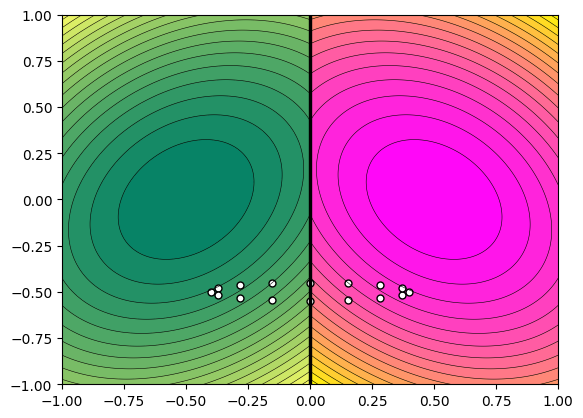

In [8]:
## ----------------------------
## just for test
## ----------------------------
## prepare potentials
hess0 = np.diag([1.0,2.0])
hess1 = np.diag([1.0,2.0])
theta = np.pi/3
R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
hess0 = R@hess1@R.T
hess1 = R.T@hess1@R
potentials = [
                HarmonicPotential(hess0,x0=[-0.5,0.0]),
                HarmonicPotential(hess1,x0=[+0.5,0.0])
             ]

## prepare parameters
beta = 10000
N = 16
rad = 1
xs = np.array( [ [0.4*rad*np.cos(theta + np.pi/2), 0.5*0.1*rad*np.sin(theta + np.pi/2) - 0.5] for theta in np.arange(0,2*np.pi,np.pi/(N/2))] )
N0 = len(xs) // 2
N1 = len(xs) - N0
print(xs)

## prepare ringpolymerpot
ring_pot = RingPolymerPotential(potentials, beta, N0, N1)
PESVisualizer(potentials, vecs=np.diag([1.0,1.0]),n_grid=300).plot(xs)


In [13]:
# ## PES along eings
# eners = [[potential.energy(x) for x in np.concatenate((xs, xs[:1])) ] for potential in potentials ]
# plt.plot( eners[0] )
# plt.plot( eners[1] )
# plt.title("energy along intial ring")
# plt.show()
# 
# ## visualize rings in 2d
# xs_roll = np.roll(xs, 1, axis=0)
# plt.plot(xs.T[0],xs.T[1], marker="x")
# plt.title("ring in x-y space")
# plt.show()
# plt.plot(xs_roll.T[0],xs_roll.T[1], marker="x")
# plt.title("ring in x-y space")
# plt.show()
# 
# ## roll dependency
# _enes = []
# for i in range(len(xs)) :
# 
#     _enes.append( ring_pot.energy(np.roll(xs,i,axis=0)) )
# 
# plt.plot(_enes )
# plt.title("roll dependency (should be constant)")
# plt.show()
# 
# 
# ## translation dependency
# ## shift along x axis
# #print( f"{ring_pot.energy(xs)=}" )
# dxs = np.zeros(xs.shape, dtype=float)
# dxs[:,0] = 1.0
# _enes = []
# for delta in np.arange(-1,1+0.25,0.25) :
#     _ene  = ring_pot.energy(xs+delta*dxs)
#     _grad = ring_pot.gradient(xs+delta*dxs)
#     print( f"{delta=:10.5f}:{_ene=:10.5f}, {np.linalg.norm(_grad)=:10.5f}" )
#     _enes.append( _ene )
#     #PESVisualizer(potentials, vecs=np.diag([1.0,1.0]),n_grid=300).plot(xs+delta*dxs)

In [10]:
## test for numerical gradient
class NumGrad :

    def __init__(self, dx = 1e-3) :

        self.dx = dx

    def numgrad(self, potential, x) :

        x = np.array(x)

        assert potential.n_dim == len(x)

        grad = np.array( [ (potential.energy(x + self.dx*vec) - 
                            potential.energy(x - self.dx*vec) )/(2*self.dx)
                            for vec in np.eye(len(x.flatten())).reshape(-1,*x.shape) ] ).reshape(x.shape)

        return grad

## test in Harmonic Potential
t_harm_pot = HarmonicPotential(np.diag([2,1]), [0.0,0.0]) ## its gradient is [2x,y]
#print( NumGrad().numgrad(potentials[0], potentials[0].x0) )
print( NumGrad().numgrad( t_harm_pot, [0.0,0.0] ))
print( NumGrad().numgrad( t_harm_pot, [1.0,0.0] ))
print( NumGrad().numgrad( t_harm_pot, [0.0,2.0] ))
print( NumGrad().numgrad( t_harm_pot, [0.5,3.0] ))
# >>> Ok!

## test in ring_pot
anagrad = ring_pot.gradient(xs)
numgrad = NumGrad().numgrad(ring_pot,xs)

print(f"{np.linalg.norm(anagrad-numgrad)=}")




[0. 0.]
[2. 0.]
[0. 2.]
[1. 3.]
np.linalg.norm(anagrad-numgrad)=np.float64(2.1555614696491215e-12)


i=   0, grad_norm =3.77908e+00, ene=   6.39212
i=   1, grad_norm =3.60756e+00, ene=   6.25282
i=   2, grad_norm =3.48421e+00, ene=   6.12503
i=   3, grad_norm =3.38572e+00, ene=   6.00541
i=   4, grad_norm =3.30198e+00, ene=   5.89224
i=   5, grad_norm =3.22787e+00, ene=   5.78446
i=   6, grad_norm =3.16044e+00, ene=   5.68137
i=   7, grad_norm =3.09792e+00, ene=   5.58249
i=   8, grad_norm =3.03915e+00, ene=   5.48744
i=   9, grad_norm =2.98338e+00, ene=   5.39593
i=  10, grad_norm =2.93011e+00, ene=   5.30772
i=  11, grad_norm =2.87900e+00, ene=   5.22262
i=  12, grad_norm =2.82978e+00, ene=   5.14044
i=  13, grad_norm =2.78227e+00, ene=   5.06104
i=  14, grad_norm =2.73632e+00, ene=   4.98427
i=  15, grad_norm =2.69182e+00, ene=   4.91001
i=  16, grad_norm =2.64868e+00, ene=   4.83813
i=  17, grad_norm =2.60680e+00, ene=   4.76853
i=  18, grad_norm =2.56612e+00, ene=   4.70111
i=  19, grad_norm =2.52657e+00, ene=   4.63577
i=  20, grad_norm =2.48809e+00, ene=   4.57242
i=  21, grad_

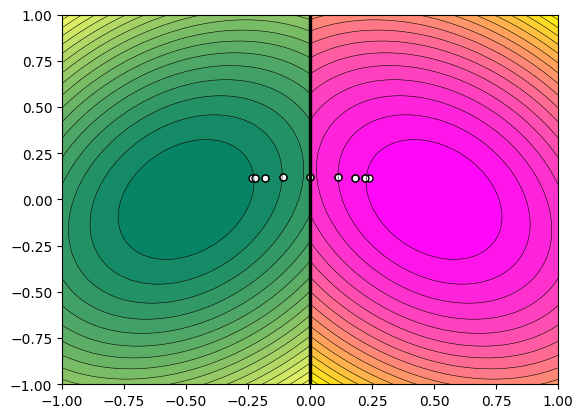

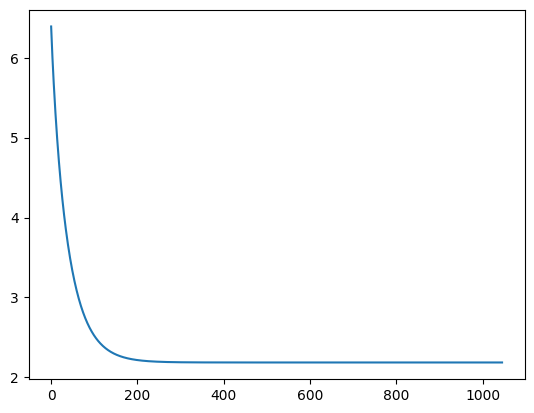

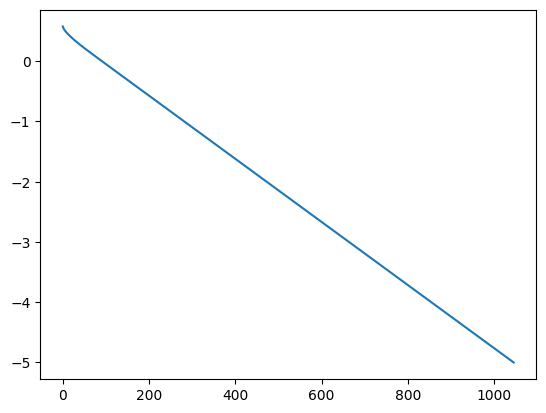

In [12]:
## optimization test
if 1 == 1 :

    beta = 1
    ring_pot = RingPolymerPotential(potentials, beta, N0, N1)

    step = 0.01
    max_step = 5000
    import copy
    _xs = copy.deepcopy(xs)
    thresh = 1e-5

    enes = []
    grad_norms  = []
    for i in range(max_step) :

        grad = ring_pot.gradient(_xs)
        #grad = NumGrad().numgrad(ring_pot,_xs)
        ene  = ring_pot.energy(_xs)
        grad_norm =np.linalg.norm(grad) 
        print( f"{i=:4d}, {grad_norm =:10.5e}, {ene=:10.5f}")

        enes.append( ene )
        grad_norms.append(grad_norm)

        if grad_norm < thresh :
            break
        else :
            _xs = _xs - step*grad

    PESVisualizer(potentials, vecs=np.diag([1.0,1.0]),n_grid=300).plot(_xs)
    plt.plot( enes )
    plt.show()

    plt.plot( np.log10(grad_norms ) )
    plt.show()


### 3.2. Half ring-polymer potential

In [15]:
class HalfRingPolymerPotential(RingPolymerPotential) :

    def __init__(self, potentials, beta, N0, N1, mass = 1 ) :

        pass
        super().__init__(potentials, beta, N0, N1, mass )

    def energy(self) :

        pass

    def gradient(self) :

        pass

    def hessian(self) :

        pass


#### 3.2.xxx test

## 4. Prepare Optimizer class
---

In [80]:
class Optimizer :

    def __init__(self) :

        self.methods = ["SD"]
        self.max_step = 10000
        self.dx       = 5e-4
        self.thresh   = 1e-4

    def optimize(self, potential, x0, method="sd", options = {}) :

        assert method.upper() in self.methods

        if method.upper() == "SD" :

            return self._optimize_sd(potential, x0, options=options)

    def _optimize_sd(self, potential, x0, options) :

        ## initialize
        _x = copy.deepcopy( np.array( x0 ) )
        if "max_step" in options :
            max_step = options["max_step"]
        else :
            max_step = self.max_step
        if "dx" in options :
            dx = options["dx"]
        else :
            dx = self.dx
        if "thresh" in options :
            thresh = options["thresh"]
        else :
            thresh = self.thresh

        ## optimize
        xs_hist = [_x]
        converged = False
        for i_step in range(max_step) :

            grad = potential.gradient(_x)

            if np.linalg.norm(grad) < thresh  :
                converged = True
                break
            else :
                _x = _x - dx*grad
                xs_hist.append(_x)

        ## output
        out = {}
        out["x"] = _x
        out["xs_hist"] = xs_hist
        out["i_step"] = i_step
        out["converged"] = converged

        return out


    

#### 4.1.xxx test

test in harmonic potential

self.n_dim = 2
2
self.n_dim = 2


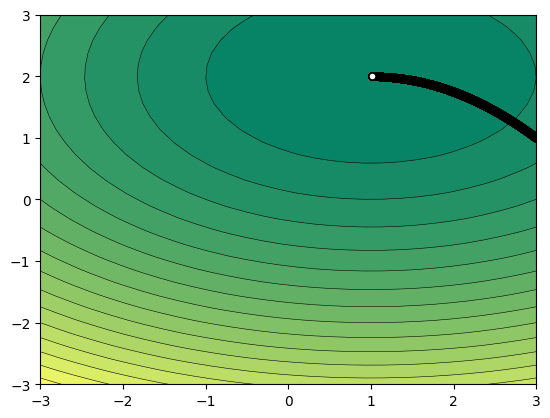

In [53]:
## prepare harmonic potential
t_harm_pot = HarmonicPotential(hess=np.diag([1.0,2.0]), x0 = [1.0,2.0] )
# Optimizer().optimize( t_harm_pot, x0 = [3.0,1.0], method="BFGS") ## not implement
opt_out = Optimizer().optimize( t_harm_pot, x0 = [3.0,1.0], method="sd")

# print( np.array( opt_out["xs_hist"] ) )
# print( np.shape(opt_out["xs_hist"]) )
# print( np.transpose([np.linspace(-0.2,0.2,10),np.linspace(-0.2,0.2,10)]).shape )

print( PESVisualizer([t_harm_pot], [[-3,3],[-3,3]], vecs = np.eye(2)).n_dim )
PESVisualizer([t_harm_pot], [[-3,3],[-3,3]], vecs = np.eye(2)).plot(opt_out["xs_hist"])

test in ring polymer potential

self.n_dim = 2


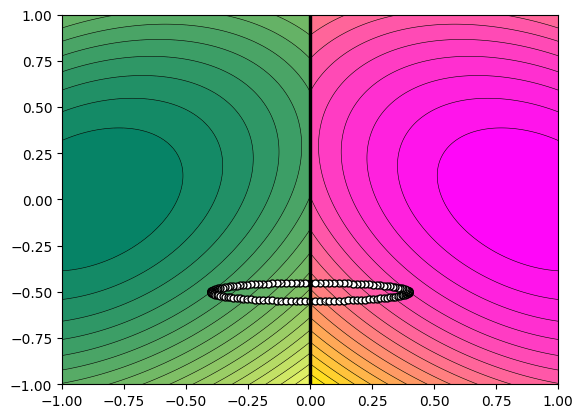

self.n_dim = 2


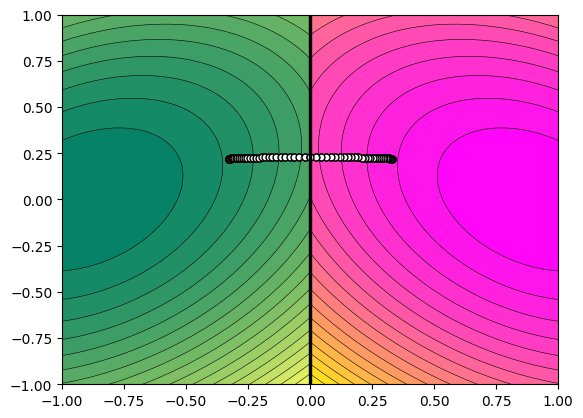

True


In [86]:

## ----------------------------
## just for test
## ----------------------------
## prepare potentials
hess0 = np.diag([1.0,2.0])
hess1 = np.diag([1.0,2.0])
theta = np.pi*(1/4)
R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
hess0 = R@hess1@R.T
hess1 = R.T@hess1@R
potentials = [
                HarmonicPotential(hess0,x0=[-0.9,0.0]),
                HarmonicPotential(hess1,x0=[+0.9,0.0])
             ]

## prepare parameters
beta = 0.1
N = 128
rad = 1
xs = np.array( [ [0.4*rad*np.cos(theta + np.pi/2), 0.5*0.1*rad*np.sin(theta + np.pi/2) - 0.5] for theta in np.arange(0,2*np.pi,np.pi/(N/2))] )
N0 = len(xs) // 2
N1 = len(xs) - N0

## prepare ringpolymerpot
ring_pot = RingPolymerPotential(potentials, beta, N0, N1)
PESVisualizer(ring_pot.potentials, vecs=np.eye(2), n_grid = 300 ).plot(xs)

## Optimizer
opt_out = Optimizer().optimize(ring_pot, xs, method="sd", options={"dx":1e-4,"max_step":10**6})
PESVisualizer(ring_pot.potentials, vecs=np.eye(2), n_grid = 300 ).plot(opt_out["x"])
print(opt_out["converged"])


## 5. Prepare rate constant calculater class
---

## 6. Actial calculation
---

### 6.1. Spin-Boson model studied in the reference paper

### 6.1.1. prepare spectral density class

$$
V_0(x) = \sum_{j=1}^f \frac{1}{2} m \omega_j^2 (x_j + \xi_j)^2
$$
$$
V_1(x) = \sum_{j=1}^f \frac{1}{2} m \omega_j^2 (x_j - \xi_j)^2
$$

振動数とmode間カップリングはspectral density $J(\omega)$ によって決める。
$$
J(\omega) = \frac{\pi}{2} \sum_j \frac{c_j^2}{m \omega_j}\delta(\omega-\omega_j)
$$
ここで、
$$
c_j = m\omega_j^2 \xi_j
$$

Referenceでは、Debye型のspectral density
$$
J(\omega) = \frac{\lambda}{2} \frac{\omega \omega_c}{\omega^2 + \omega_c^2}
$$
を,以下の式に基づき$f = 12$ モードに離散化している。
$$
\omega_j = \omega_c \tan{\frac{(j-\frac{1}{2})\pi}{2f}}
$$
$$
c_j = \sqrt{\frac{\lambda}{2f}} \omega_j
$$

Referenceで用いられたパラメータ
- $T = 300 \text{ K}$
- $\omega_c = 500 \text{ cm}^{-1} $
- $\lambda = 40 \text{ kcal/mol}$

In [147]:
class SpectralDensity :

    def __init__(self, freqs, coeffs, mass = 1) :

        assert len(freqs) == len(coeffs)

        self.freqs  = np.array( freqs  )
        self.coeffs = np.array( coeffs )
        self.mass   = mass

    def to_harmonic_potentials(self, driving_force = 0.0 ) :

        xi = self.coeffs/(self.mass*self.freqs**2.0)

        return [
            HarmonicPotential(np.diag(self.freqs**2.0), x0 = -1.0*xi ),
            HarmonicPotential(np.diag(self.freqs**2.0), x0 = +1.0*xi, V0 = -1.0*driving_force)
        ]

## for test
# freqs =  [1.0,2.0]
# coeffs = [1.0,1.0]
# vecs = np.eye(2)
# potentials = SpectralDensity(freqs=freqs,coeffs=coeffs).to_harmonic_potentials(driving_force=+0.0)
# PESVisualizer(potentials, vecs=vecs, n_grid=500).plot() 
# potentials = SpectralDensity(freqs=freqs,coeffs=coeffs).to_harmonic_potentials(driving_force=+1.0)
# PESVisualizer(potentials, vecs=vecs, n_grid=500).plot()
# potentials = SpectralDensity(freqs=freqs,coeffs=coeffs).to_harmonic_potentials(driving_force=-1.0)
# PESVisualizer(potentials, vecs=vecs, n_grid=500).plot()


In [237]:
class DebyeSpectralDensity :

    def __init__(self, lamb, freq_c) :

        self.lamb = lamb
        self.freq_c = freq_c

    def density(self, freq) :

        return 0.50*self.lamb*freq*self.freq_c/(freq**2 + self.freq_c**2)

    def plot(self, max_freq = 4000, delta_freq = 0.5 ) :

        delta_freq = delta_freq
        freqs = np.arange(0, max_freq, delta_freq)
        densities = self.density(freqs)

        plt.plot(freqs, densities)

    def to_descretized_spectral_density(self, n_dim) :

        freqs = [ self.freq_c*np.tan((j-0.5)*np.pi/(2*n_dim)) 
                  for j in range(1,n_dim+1) ]
        coeffs = [ np.sqrt(self.lamb/(2*n_dim))*freq for freq in freqs ]

        return SpectralDensity(freqs=freqs,coeffs=coeffs)

## for test
#freq_cminv = 500
#lamb_cminv = 40*(kcal/NAvo)/CmInv
#print(lamb_cminv)

#DebyeSpectralDensity(lamb_cminv, freq_cminv ).plot()
#spectral_density = DebyeSpectralDensity( lamb_cminv, freq_cminv ).to_descretized_spectral_density(n_dim=12)
#potentials = spectral_density.to_harmonic_potentials()
#print(potentials[0].n_dim)
#print(np.eye(12)[:2,:])
#print(np.eye(12)[(0,2),:])

#PESVisualizer(potentials,vecs=np.eye(12)[(0,1),], n_grid=300).plot()
#PESVisualizer(potentials,vecs=np.eye(12)[(0,2),], n_grid=300).plot()
#PESVisualizer(potentials,vecs=np.eye(12)[(0,3),], n_grid=300).plot()
#PESVisualizer(potentials,vecs=np.eye(12)[(1,0),], n_grid=300).plot()
#PESVisualizer(potentials,vecs=np.eye(12)[(1,2),], n_grid=300).plot()
#PESVisualizer(potentials,vecs=np.eye(12)[(1,3),], n_grid=300).plot()
#PESVisualizer(potentials,vecs=np.eye(12)[:2,], n_grid=300).plot()

#### 6.1.2. prepare harmonic potentials for reported parameters

driving_force_au=0.003808798847133431
potentials[0].x0*(me/amu)**0.5 =array([-8.0838663 , -2.66370863, -1.56087183, -1.07441854, -0.79296847,
       -0.60417196, -0.46466123, -0.35403084, -0.26129044, -0.179858  ,
       -0.10539264, -0.03472785]) 
potentials[1].x0*(me/amu)**0.5 =array([8.0838663 , 2.66370863, 1.56087183, 1.07441854, 0.79296847,
       0.60417196, 0.46466123, 0.35403084, 0.26129044, 0.179858  ,
       0.10539264, 0.03472785]) 
[  32.77173141   99.45618369  169.72712943  246.57271302  334.08931896
  438.4882315   570.14072908  748.30288133 1013.89970099 1472.95250227
 2513.66974606 7628.52584413]
self.n_dim = 2


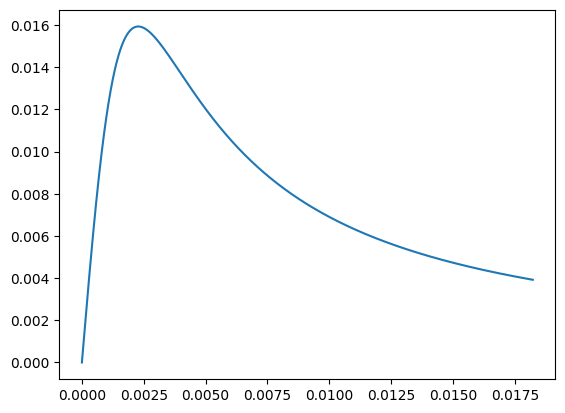

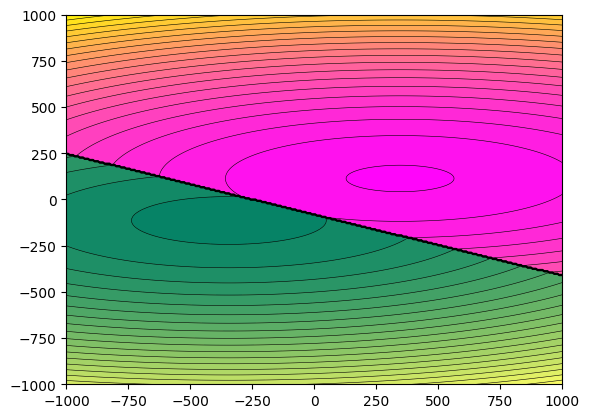

In [250]:
freq_cminv = 500
lamb_cminv = 40*(kcal/NAvo)/CmInv ## corresponding to 40 kcal/mol
n_dim = 12

freq_au = freq_cminv*CmInv/Hartree
lamb_au = lamb_cminv*CmInv/Hartree
driving_force_au = 10.0*(1000*Joule/NAvo)/Hartree
print(f"{driving_force_au=}")

debye_spectral_density = DebyeSpectralDensity(lamb_au, freq_au )
debye_spectral_density.plot(max_freq = 4000.0*CmInv/Hartree, delta_freq=1.0*CmInv/Hartree)
spectral_density = debye_spectral_density.to_descretized_spectral_density(n_dim=n_dim)
potentials = spectral_density.to_harmonic_potentials(driving_force=driving_force_au)

## check the displacement order
print(f"{potentials[0].x0*(me/amu)**0.5 =} ")
print(f"{potentials[1].x0*(me/amu)**0.5 =} ")

## print freqs
print(np.diag(potentials[0].hess)**0.5*Hartree/CmInv)

#PESVisualizer(potentials, vecs=np.eye(n_dim)[(0,),:],n_grid=300, lims=[[-1000,1000]]).plot()
PESVisualizer(potentials, vecs=np.eye(n_dim)[(0,1),:],n_grid=300, lims=[[-1000,1000],[-1000,1000]]).plot()

(128, 12)
self.n_dim = 2


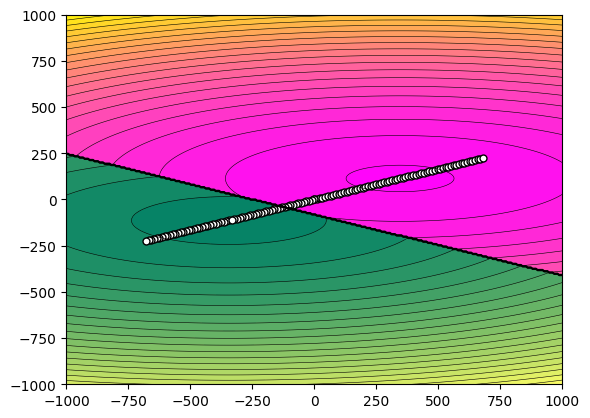

opt_out['converged']=True


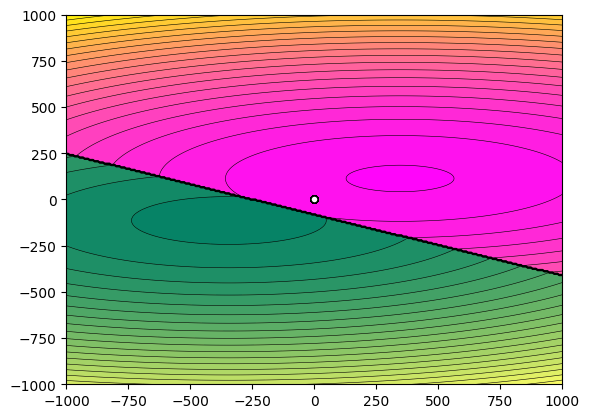

N0= 2,N1=126,ring_pot.energy(opt_out['x'])=      0.636078300840
N0= 4,N1=124,ring_pot.energy(opt_out['x'])=      0.699054143801
N0= 6,N1=122,ring_pot.energy(opt_out['x'])=      0.758448392170
N0= 8,N1=120,ring_pot.energy(opt_out['x'])=      0.814586897152
N0=10,N1=118,ring_pot.energy(opt_out['x'])=      0.867745127569
N0=12,N1=116,ring_pot.energy(opt_out['x'])=      0.918156767419
N0=14,N1=114,ring_pot.energy(opt_out['x'])=      0.966020781432
N0=16,N1=112,ring_pot.energy(opt_out['x'])=      1.011507223954
N0=18,N1=110,ring_pot.energy(opt_out['x'])=      1.054762016823
N0=20,N1=108,ring_pot.energy(opt_out['x'])=      1.095910881203
N0=22,N1=106,ring_pot.energy(opt_out['x'])=      1.135062574987
N0=24,N1=104,ring_pot.energy(opt_out['x'])=      1.172311560031
N0=26,N1=102,ring_pot.energy(opt_out['x'])=      1.207740201111
N0=28,N1=100,ring_pot.energy(opt_out['x'])=      1.241420580102
N0=30,N1=98,ring_pot.energy(opt_out['x'])=      1.273415993860
N0=32,N1=96,ring_pot.energy(opt_out['x'])

In [252]:
## prepare beta in atomic unit
temper_K = 300
beta_au = 1/((temper_K*KB_SI)*Joule/Hartree)

## prepare initial rings in au(Bohr me^0.5)
N = 128
N0 = N // 2
N1 = N - N0

delta_x = potentials[1].x0 - potentials[0].x0
xs_0 = [  delta_x*i/N0 for i in range(N0) ]
xs_1 = [ -delta_x*i/N1 for i in range(N1) ]
xs = np.concatenate([xs_0,xs_1])
xs = np.roll(xs,N//4,axis=0)
print(xs.shape)

pesvisualizer = PESVisualizer(potentials=potentials,lims=[[-1000,1000],[-1000,1000]], vecs = np.eye(n_dim)[(0,1),:],n_grid=300)
#pesvisualizer = PESVisualizer(potentials=potentials,lims=[[-1,1],[-1,1]], vecs = np.eye(n_dim)[(0,1),:],n_grid=300)
pesvisualizer.plot(xs)
# PESVisualizer(potentials=potentials,lims=[[-3000,3000],[-3000,3000]], 
              # vecs = [delta_x/np.linalg.norm(delta_x), np.eye(n_dim)[3]],
              # n_grid=300).plot(xs)

ring_pot = RingPolymerPotential(potentials=potentials, beta=beta_au,N0=N0, N1=N1)

opt_out = Optimizer().optimize(potential=ring_pot, x0 = xs, method="sd", options={"dx":1, "max_step":50000})

print(f"{opt_out['converged']=}")
pesvisualizer.plot(opt_out["x"])

for N0 in np.arange(2,N,2) :

    N1 = N - N0
    _xs = np.roll(xs,N0-N1,axis=0)

    ring_pot = RingPolymerPotential(potentials=potentials, beta=beta_au,N0=N0, N1=N1)
    opt_out = Optimizer().optimize(potential=ring_pot, x0 = _xs, method="sd", options={"dx":1, "max_step":50000})

    print(f"{N0=:2d},{N1=:2d},{ring_pot.energy(opt_out['x'])=:20.12f}")





### 6.1. two harmonic potentials symmetric case

#### 6.1.1. prepare harmonic potentials

#### 6.1.2. optimization

#### 6.1.3. compute rate